In [1]:
import pandas as pd
import evaluate
import utils

  EXISTS: gene2go
HMS:0:00:04.129995 340,574 annotations, 20,692 genes, 18,417 GOs, 1 taxids READ: gene2go 


In [2]:
pegah_genes = pd.read_csv('./data/pegah_genes.csv')
pegah_genes = pegah_genes.loc[:, 'gene_symbol']

In [3]:
pegah_genes

0        CCKAR
1         DVL1
2        SORL1
3        PAIP1
4        OPHN1
         ...  
999      TRPC4
1000     KCNA2
1001    SYNPO2
1002      LRP2
1003     STX17
Name: gene_symbol, Length: 1004, dtype: object

In [4]:
emb_df = pd.read_table('./data/adult_brainarea_vs_genes_exp_reannotator_donors_10021-9861-14380-15697-15496-12876.tsv', index_col='gene_symbol')

In [5]:
emb_df = emb_df[emb_df.index.isin(pegah_genes)]

In [6]:
%%time
GO_evals = evaluate.perform_GOclass_eval(emb_df, min_GO_size=200, max_GO_size=300)

There are 62 GO groups that will be evaluated.
----------------------------------------------------------------------------------------------------
GO:0001525
Fold:0 F1:0.0 AUC:0.4858247422680413
Fold:1 F1:0.0 AUC:0.4378238341968912
Fold:2 F1:0.0 AUC:0.3212435233160622
Fold:3 F1:0.11111111111111112 AUC:0.3659326424870466
Fold:4 F1:0.0 AUC:0.1567357512953368
----------------------------------------------------------------------------------------------------
GO:0042493
Fold:0 F1:0.07142857142857142 AUC:0.5372340425531914
Fold:1 F1:0.0 AUC:0.4940898345153665
Fold:2 F1:0.07407407407407407 AUC:0.5319148936170213
Fold:3 F1:0.0 AUC:0.4462174940898345
Fold:4 F1:0.08695652173913043 AUC:0.5574866310160428
----------------------------------------------------------------------------------------------------
GO:0005768
Fold:0 F1:0.10526315789473685 AUC:0.6544502617801047
Fold:1 F1:0.15384615384615383 AUC:0.631762652705061
Fold:2 F1:0.0 AUC:0.5157068062827225
Fold:3 F1:0.1111111111111111 AUC:0.710296

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Fold:0 F1:0.0 AUC:0.3908629441624365


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [7]:
pegah_entrez = utils.genesymbols_2_entrezids(pegah_genes)

In [8]:
pegah_entrez

,gene_symbol,entrez_id
28,CA2,760.0
30,CA3,761.0
51,CCK,885.0
53,CCKBR,887.0
199,CDH13,1012.0
...,...,...
47031,CHRM5,1133.0
47039,CHRNA3,1136.0
47042,CHRNA4,1137.0
47045,CHRNA5,1138.0


In [18]:
GO_labels = evaluate.get_GO_presence_labels(pegah_entrez.entrez_id)#, min_GO_size=400, max_GO_size=900)

In [19]:
# there are 4 genes present in the GO group
GO_labels.loc[:, 'GO:0061630'].sum()

4

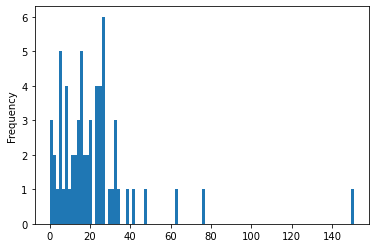

In [11]:
GO_labels.sum().plot(kind='hist', bins=100)

In [13]:
%%time
GO_evals = evaluate.perform_GOclass_eval(emb_df, min_GO_size=400, max_GO_size=900)

There are 49 GO groups that will be evaluated.
----------------------------------------------------------------------------------------------------
GO:0003674
Fold:0 F1:0.0 AUC:0.7282051282051281
Fold:1 F1:0.0 AUC:0.4358974358974359
Fold:2 F1:0.0 AUC:0.5515463917525774
Fold:3 F1:0.0 AUC:0.5670103092783505
Fold:4 F1:0.28571428571428575 AUC:0.6941580756013745
----------------------------------------------------------------------------------------------------
GO:0008150
Fold:0 F1:0.0 AUC:0.5408163265306123
Fold:1 F1:0.0 AUC:0.6836734693877551
Fold:2 F1:0.0 AUC:0.23469387755102045
Fold:3 F1:0.0 AUC:0.25897435897435894
Fold:4 F1:0.0 AUC:0.09743589743589742
----------------------------------------------------------------------------------------------------
GO:0043312
Fold:0 F1:0.2 AUC:0.5572916666666666
Fold:1 F1:0.0 AUC:0.6468750000000001
Fold:2 F1:0.0 AUC:0.5416666666666666
Fold:3 F1:0.19047619047619044 AUC:0.7015706806282722
Fold:4 F1:0.0 AUC:0.600349040139616
----------------------------

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: False